In [1]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

In [2]:
# Read in the data and save
dia = pd.read_csv('C:/Users/Kirsten Korsrud/Documents/diabetes data/data-ori.csv')

#Preprocess Data. All strings must be converted to a number (float) for model training
dia.SEX = dia.replace('F',0)
dia.SEX = dia.replace('M',1)

# Sort the data based on the features (X) and the classes (y)

X=dia[['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE', 'MCH', 'MCHC', 'MCV']]
y=dia['SOURCE']

# train_test_split splits the data according to a test size of 1/3 into data for training the model, and testing the model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1/3))

In [3]:
# create an instance of Quadratic Discriminant Analysis and fit the data.
model = QuadraticDiscriminantAnalysis()
model.fit(X, y)

QuadraticDiscriminantAnalysis()

In [4]:
#Define method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('accuracy=',np.mean(scores)) 

accuracy= 0.6491482062910635


In [5]:
new = [34,10.2,5.27,16.2,570,19.5,33.3,69.5]

##predict which class the new observation belongs to. Each value in 'new' corresponds to the features defined in 'X' initially
#the model predicts that this patient, based on these values, will require 'in'-patient care
model.predict([new])

array(['in'], dtype=object)

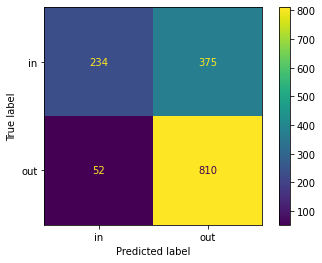

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.svm import SVC

clf = SVC(random_state=0)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

plt.show()